## Pymaceuticals Observations

Of the 249 original mice records, 248 records were valid for analysis and 1 was dropped due to having duplicate entries across timepoints. 

Among the four drugs of interest (Capomulin, Ramicane, Infubinol, Ceftamin), Capomulin had the most outliers for final tumor volume. It also had to the most observed timepoints for any drug in the dataset.

Weight and Tumor Volume are strongly correlated among mice treated with Capomulin (coef: 0.84)


In [387]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# Combine the data into a single dataset
# Display the data table for preview

In [388]:
study_results = pd.read_csv(study_results_path)
results_df = study_results.sort_values(["Mouse ID"], ascending = False)
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
15,z969,0,45.000000,0
530,z969,10,52.656081,1
909,z969,15,54.713005,2
1407,z969,30,65.841013,3
301,z969,5,49.332999,0


In [389]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
metadata_df = mouse_metadata.sort_values(by = ["Mouse ID"], ascending = False)
metadata_df["Mouse ID"].nunique()


249

In [390]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 248 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ KB


In [391]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 15 to 1804
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 73.9+ KB


In [392]:
drop_mouse_id = metadata_df["Mouse ID"].unique()
results2 = results_df[results_df["Mouse ID"].isin(drop_mouse_id) == True]
results2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 15 to 1804
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 73.9+ KB


In [393]:
merged = pd.merge(results_df,metadata_df,on="Mouse ID",how="left")
merged = merged.sort_values(by = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"], ascending = False)
merged.info()
# The sort_values applied here means that when the dataframe is deduplicated, 
# the last timepoint and largest tumor volume are retained of the duplicated entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 8 to 1884
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [394]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged["Mouse ID - Timepoint"] = merged["Mouse ID"] + "-" + merged["Timepoint"].astype(str)
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse ID - Timepoint
8,z969,45,73.867845,4,Naftisol,Male,9,30,z969-45
7,z969,40,70.314904,4,Naftisol,Male,9,30,z969-40
9,z969,35,69.176246,4,Naftisol,Male,9,30,z969-35
3,z969,30,65.841013,3,Naftisol,Male,9,30,z969-30
5,z969,25,63.145652,2,Naftisol,Male,9,30,z969-25


In [395]:
#merged.drop_duplicates(subset =["Mouse ID - Timepoint"])
#merged.info()

In [396]:
#drop_mouse_id = merged["Mouse ID"].unique()
#drop_mouse_id

In [397]:
#merged_clean = merged[merged["Mouse ID"].isin(drop_mouse_id) == True]
#merged_clean.info()
#erged_clean.describe()

In [398]:
merged["Is Duplicate"] = merged.duplicated(["Mouse ID - Timepoint"])
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse ID - Timepoint,Is Duplicate
8,z969,45,73.867845,4,Naftisol,Male,9,30,z969-45,False
7,z969,40,70.314904,4,Naftisol,Male,9,30,z969-40,False
9,z969,35,69.176246,4,Naftisol,Male,9,30,z969-35,False
3,z969,30,65.841013,3,Naftisol,Male,9,30,z969-30,False
5,z969,25,63.145652,2,Naftisol,Male,9,30,z969-25,False


In [399]:
# Checking the number of mice.
mousecount = merged["Mouse ID - Timepoint"].nunique()
mousecount_all = merged["Mouse ID - Timepoint"].count()
dup_count = mousecount_all - mousecount

print(f"There are {mousecount} unique Mouse IDs & Timepoint combinations in merged dataframe and {mousecount_all} total Mouse IDs & Timepoint combinations in the dataframe.")
print(f"There are {dup_count} duplicates.")

There are 1888 unique Mouse IDs & Timepoint combinations in merged dataframe and 1893 total Mouse IDs & Timepoint combinations in the dataframe.
There are 5 duplicates.


In [400]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
merged_dups = merged[merged["Is Duplicate"] == True]
merged_dups.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse ID - Timepoint,Is Duplicate
1302,g989,20,54.657650,1,Propriva,Female,21,26,g989-20,True
1298,g989,15,51.325852,1,Propriva,Female,21,26,g989-15,True
1305,g989,10,49.880528,0,Propriva,Female,21,26,g989-10,True
1295,g989,5,47.570392,0,Propriva,Female,21,26,g989-5,True
1306,g989,0,45.000000,0,Propriva,Female,21,26,g989-0,True


In [401]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_clean = merged[merged["Mouse ID"].isin(merged_dups["Mouse ID"])==False]
# merged_clean.info(15)
mousecount_final = merged_clean["Mouse ID"].nunique()
print(f"There are {mousecount_final} unique Mouse IDs in merged dataframe.")

There are 248 unique Mouse IDs in merged dataframe.


## Summary Statistics

In [402]:
# Generate a summary statistics table of:
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assemble the resulting series into a single summary dataframe.

avg_tumor = merged_clean["Tumor Volume (mm3)"].mean()
med_tumor = merged_clean["Tumor Volume (mm3)"].median()
var_tumor = merged_clean["Tumor Volume (mm3)"].var()
std_tumor = merged_clean["Tumor Volume (mm3)"].std()
sem_tumor = merged_clean["Tumor Volume (mm3)"].sem()

tumor_summary_1 = pd.DataFrame([{"Average Tumor Volume": avg_tumor,
                    "Median Tumor Volume": med_tumor,
                     "Variance of Tumor Volume": var_tumor,\
                     "Standard Deviation of Tumor Volume": std_tumor,\
                     "Standard Error of Tumor Volume": sem_tumor}])
tumor_summary_1.round(3)

,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume
0,50.435,48.933,79.463,8.914,0.206


In [403]:
# Use groupby and summary statistical methods to calculate the following properties 
# of each drug regimen:mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

tumor_summary_2 = merged_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "std", "var", "sem"]}).round(3)
tumor_summary_2


Tumor Volume (mm3)                              
                           mean  median    std     var    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  4.995  24.948  0.329
Ceftamin                 52.591  51.776  6.268  39.290  0.470
Infubinol                52.885  51.821  6.567  43.129  0.492
Ketapril                 55.236  53.699  8.280  68.554  0.604
Naftisol                 54.332  52.509  8.135  66.173  0.596
Placebo                  54.034  52.289  7.821  61.168  0.581
Propriva                 52.321  50.446  6.622  43.852  0.544
Ramicane                 40.217  40.673  4.846  23.487  0.321
Stelasyn                 54.233  52.432  7.710  59.451  0.573
Zoniferol                53.237  51.818  6.967  48.533  0.516

## Bar and Pie Charts

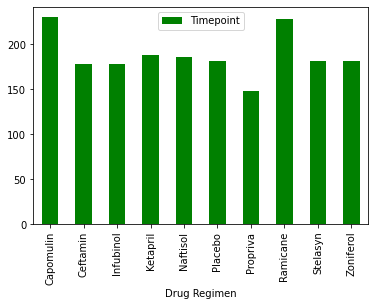

In [404]:
# Generate a bar plot showing the total number of timepoints for all mice
# tested for each drug regimen using Pandas.

timepoints_df = pd.DataFrame(merged_clean.groupby(["Drug Regimen"])["Timepoint"].count())
timepoints_df.plot(kind="bar", color = "green")
plt.show()

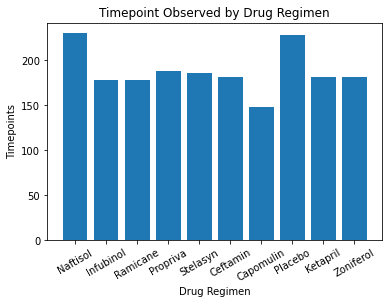

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


In [405]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

drugs = merged_clean["Drug Regimen"].unique()
timepoints = merged_clean.groupby(["Drug Regimen"])["Timepoint"].count()

plt.title("Timepoint Observed by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation = 30)
plt.bar(drugs, timepoints)
plt.show()

print(timepoints)

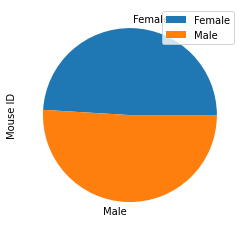

In [406]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = pd.DataFrame(merged_clean.groupby(["Sex"])["Mouse ID"].count())
piechart_1 = mouse_sex.plot.pie(subplots = True)
plt.show()

In [407]:
mouse_sex

,Mouse ID
Sex,
Female,922
Male,958


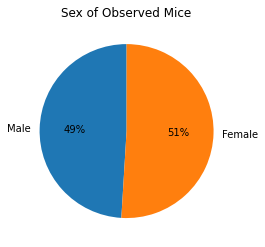

In [408]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = merged_clean["Sex"].unique() 
size = mouse_sex["Mouse ID"]
plt.title("Sex of Observed Mice")
plt.pie(size, labels = sex, startangle= 90, autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [409]:
merged_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse ID - Timepoint,Is Duplicate
8,z969,45,73.867845,4,Naftisol,Male,9,30,z969-45,False
7,z969,40,70.314904,4,Naftisol,Male,9,30,z969-40,False
9,z969,35,69.176246,4,Naftisol,Male,9,30,z969-35,False
3,z969,30,65.841013,3,Naftisol,Male,9,30,z969-30,False
5,z969,25,63.145652,2,Naftisol,Male,9,30,z969-25,False


In [410]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = pd.DataFrame(merged_clean.groupby(["Mouse ID"])["Timepoint"].max())
# max_timepoint = pd.DataFrame(max_timepoint.reset_index())
# max_timepoint["Mouse ID - Timepoint"] = max_timepoint["Mouse ID"] + "-" + max_timepoint["Timepoint"].astype(str)
#print(max_timepoint_df)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged2_clean = pd.merge(merged_clean, max_timepoint_df, on ="Mouse ID")


# Joining on the concatenated Mouse ID and Timepoint column limits the dataframe to only the final tumor volumes
# drugs_merged_ftp = pd.merge(merged_clean, max_timepoint,on="Mouse ID - Timepoint",how="inner")
# drugs_merged_all = pd.merge(merged_clean, max_timepoint,on="Mouse ID - Timepoint",how="left")
# drugs_merged_ftp.info()
merged2_clean.head()

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse ID - Timepoint,Is Duplicate,Timepoint_y
0,z969,45,73.867845,4,Naftisol,Male,9,30,z969-45,False,45
1,z969,40,70.314904,4,Naftisol,Male,9,30,z969-40,False,45
2,z969,35,69.176246,4,Naftisol,Male,9,30,z969-35,False,45
3,z969,30,65.841013,3,Naftisol,Male,9,30,z969-30,False,45
4,z969,25,63.145652,2,Naftisol,Male,9,30,z969-25,False,45


In [411]:

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumorvol = []

for drug in drugs:
    drug_df = merged2_clean.loc[merged2_clean["Drug Regimen"] == drug]
    final_tp_df = drug_df.loc[drug_df["Timepoint_y"] == drug_df["Timepoint_y"]]
    
    max_tv = final_tp_df["Tumor Volume (mm3)"]
    final_tumorvol.append(max_tv)
    
    quartiles = max_tv.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = (upperq-lowerq).round(2)
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    
    outliers = (max_tv.loc[(final_tp_df["Tumor Volume (mm3)"] >=upper_bound) |(final_tp_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    total_count = final_tp_df["Tumor Volume (mm3)"].count()

    print(f"IQR for {drug}: {iqr}")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range  is: {iqr}")
    print(f"The the median is: {quartiles[0.5].round(2)} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"There are {outliers} outliers in the {drug} group of {total_count} data points.")
    print("----------")
    


IQR for Capomulin: 7.31
The lower quartile is: 37.69
The upper quartile is: 45.0
The interquartile range  is: 7.31
The the median is: 41.56 
Values below 26.72 could be outliers.
Values above 55.96 could be outliers.
There are 2 outliers in the Capomulin group of 230 data points.
----------
IQR for Ramicane: 8.33
The lower quartile is: 36.67
The upper quartile is: 45.0
The interquartile range  is: 8.33
The the median is: 40.67 
Values below 24.18 could be outliers.
Values above 57.5 could be outliers.
There are 1 outliers in the Ramicane group of 228 data points.
----------
IQR for Infubinol: 10.0
The lower quartile is: 47.31
The upper quartile is: 57.31
The interquartile range  is: 10.0
The the median is: 51.82 
Values below 32.31 could be outliers.
Values above 72.31 could be outliers.
There are 0 outliers in the Infubinol group of 178 data points.
----------
IQR for Ceftamin: 9.59
The lower quartile is: 47.21
The upper quartile is: 56.8
The interquartile range  is: 9.59
The the medi

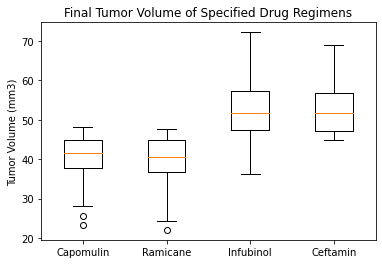

In [412]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(final_tumorvol)
plt.xticks([1, 2, 3, 4], drugs)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volume of Specified Drug Regimens")
plt.show()

## Line and Scatter Plots

['y793' 'x401' 'w914' 'w150' 'v923' 'u364' 't565' 's710' 's185' 'r944'
 'r554' 'r157' 'm957' 'm601' 'l897' 'l509' 'j246' 'j119' 'i738' 'i557'
 'g316' 'g288' 'f966' 'b742' 'b128']


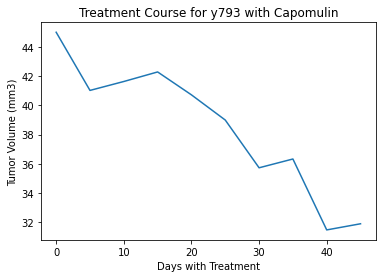

In [413]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Find a mouse treated with Capomulin
find_mouse_df = merged2_clean[merged2_clean["Drug Regimen"] == "Capomulin"]
which_mouse = find_mouse_df["Mouse ID"].unique()
print(which_mouse)
# which_mouse used to list the Mouse IDs. This first item, "y793", is used

found_mouse = find_mouse_df[find_mouse_df["Mouse ID"]== "y793"]

plt.plot(found_mouse["Timepoint_x"], found_mouse["Tumor Volume (mm3)"])
plt.title(f"Treatment Course for y793 with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Days with Treatment")
plt.show()

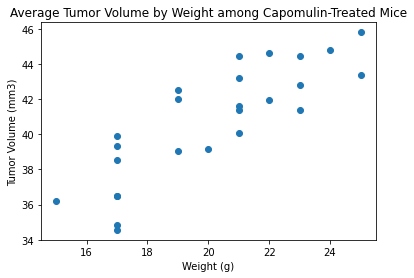

In [414]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumorvol = pd.DataFrame(find_mouse_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean())
avg_tumorvol = pd.merge(find_mouse_df, avg_tumorvol, on = "Mouse ID")

avg_tumorvol_dedup = avg_tumorvol[["Weight (g)", "Tumor Volume (mm3)_y"]].drop_duplicates()
avg_tumorvol_dedup

x_axisplt = avg_tumorvol_dedup["Weight (g)"]
y_axisplt = avg_tumorvol_dedup["Tumor Volume (mm3)_y"]
plt.scatter(x_axisplt, y_axisplt)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight among Capomulin-Treated Mice")
plt.show()

## Correlation and Regression

In [415]:
print(linregress)

<function linregress at 0x000001EA9A562040>


Correleation coefficient for Tumor Volume (mm3) and Weight (g): 0.84


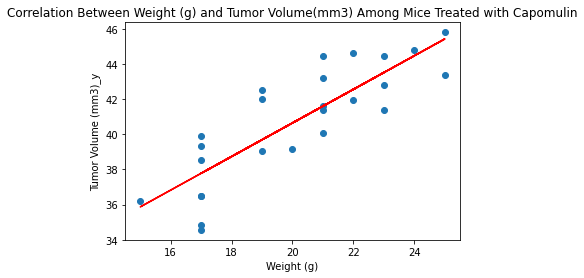

Trendline Equation: y = 0.95x + 21.55


In [416]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axisplt = avg_tumorvol_dedup["Weight (g)"]
y_axisplt = avg_tumorvol_dedup["Tumor Volume (mm3)_y"]

correlation = st.pearsonr(x_axisplt,y_axisplt)
print(f"Correleation coefficient for Tumor Volume (mm3) and Weight (g): {round(correlation[0],2)}")

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axisplt, y_axisplt)
regress_values =x_axisplt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axisplt,y_axisplt)
plt.plot(x_axisplt,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)_y")

plt.annotate(line_eq,(1,1), fontsize=15, color="red")
plt.title(f"Correlation Between Weight (g) and Tumor Volume(mm3) Among Mice Treated with Capomulin")
plt.show()
print(f"Trendline Equation: {line_eq}")